In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = '/content/weather_stock_analysis_data.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Timestamp,temp,humidity,feels_like,wind_speed,SSE open,SSE volume,AV open price,AV volume,TSCO open price,TSCO volume
0,12/6/2024 8:00,6.38,76,2.22,7.20,1721.50000,0,487.899994,0,374.200012,0
1,12/6/2024 9:00,6.50,77,4.54,2.68,1717.34375,25417,487.000000,823723,370.044098,370997
2,12/6/2024 10:00,7.27,75,3.91,5.66,1716.50000,45667,485.898895,303381,369.899994,317463
3,12/6/2024 11:00,8.22,74,5.31,5.14,1717.00000,23519,486.299988,223898,370.500000,1458266
4,12/6/2024 12:00,8.98,72,6.47,4.63,1711.50000,106441,487.600006,5745716,369.100006,455526


In [2]:
# Select relevant columns for analysis
relevant_columns = ['temp', 'humidity', 'feels_like', 'wind_speed', 'SSE open', 'AV open price', 'TSCO open price']
filtered_data = data[relevant_columns]

# Check for missing values
missing_values = filtered_data.isnull().sum()

# Display the filtered data and missing values
filtered_data.head(), missing_values


(   temp  humidity  feels_like  wind_speed    SSE open  AV open price  \
 0  6.38        76        2.22        7.20  1721.50000     487.899994   
 1  6.50        77        4.54        2.68  1717.34375     487.000000   
 2  7.27        75        3.91        5.66  1716.50000     485.898895   
 3  8.22        74        5.31        5.14  1717.00000     486.299988   
 4  8.98        72        6.47        4.63  1711.50000     487.600006   
 
    TSCO open price  
 0       374.200012  
 1       370.044098  
 2       369.899994  
 3       370.500000  
 4       369.100006  ,
 temp               0
 humidity           0
 feels_like         0
 wind_speed         0
 SSE open           0
 AV open price      0
 TSCO open price    0
 dtype: int64)

Genrate heatmaps of correlation of weather factos for each stock price seprately

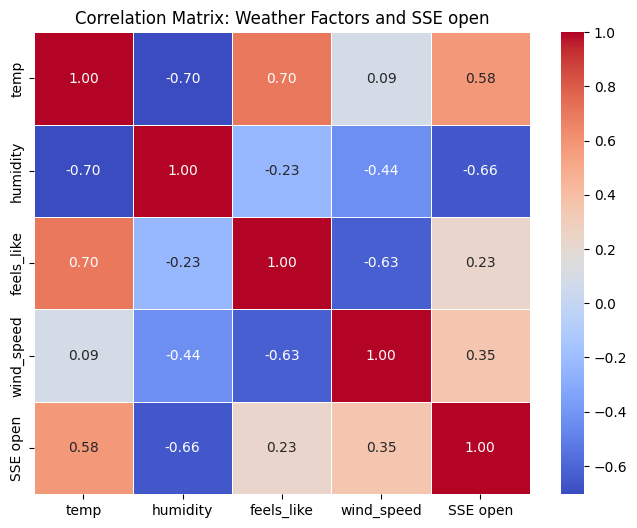

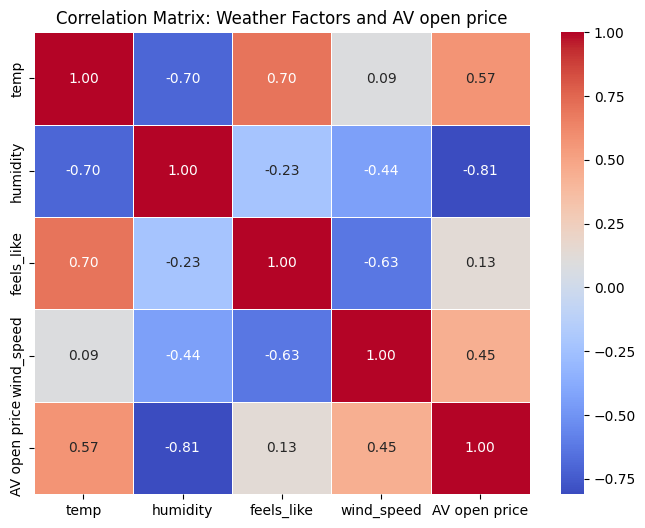

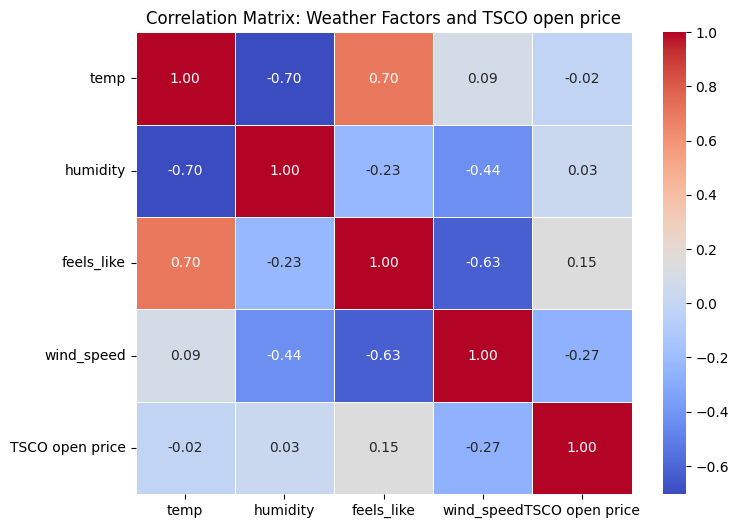

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Define stocks to analyze separately
stocks = ['SSE open', 'AV open price', 'TSCO open price']

# Generate individual heatmaps for each stock and its correlation with weather factors
for stock in stocks:
    # Create a subset of weather factors and the current stock
    subset = filtered_data[['temp', 'humidity', 'feels_like', 'wind_speed', stock]]

    # Compute correlation matrix for the subset
    correlation_matrix = subset.corr()

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Matrix: Weather Factors and {stock}')
    plt.show()


Significance of each feature by p-values

In [4]:
from scipy.stats import pearsonr

# Initialize a dictionary to store results
significance_results = {}

# Weather factors
weather_factors = ['temp', 'humidity', 'feels_like', 'wind_speed']

# Test significance for each stock and weather factor
for stock in ['SSE open', 'AV open price', 'TSCO open price']:
    stock_results = {}
    for factor in weather_factors:
        # Compute Pearson correlation and p-value
        corr, p_value = pearsonr(filtered_data[factor], filtered_data[stock])
        stock_results[factor] = {'correlation': corr, 'p-value': p_value}
    significance_results[stock] = stock_results

# Format results for better readability
import pandas as pd
results_df = pd.DataFrame(
    {(stock, factor): significance_results[stock][factor]
     for stock in significance_results
     for factor in significance_results[stock]}
).T

# Clean the DataFrame for display
results_df.columns = ['Correlation', 'P-Value']
results_df.index = pd.MultiIndex.from_tuples(results_df.index, names=['Stock', 'Weather Factor'])

# Format the DataFrame for better readability with 4 decimal points
results_df = results_df.applymap(lambda x: f'{x:.7f}')

results_df


<ipython-input-4-c04fe7ca3211>:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df = results_df.applymap(lambda x: f'{x:.7f}')


Correlation    P-Value
Stock           Weather Factor                       
SSE open        temp             0.5789504  0.0000310
                humidity        -0.6590554  0.0000009
                feels_like       0.2330111  0.1234652
                wind_speed       0.3494668  0.0186200
AV open price   temp             0.5710610  0.0000419
                humidity        -0.8106749  0.0000000
                feels_like       0.1330693  0.3835244
                wind_speed       0.4473368  0.0020635
TSCO open price temp            -0.0168895  0.9123158
                humidity         0.0313423  0.8380533
                feels_like       0.1515089  0.3204652
                wind_speed      -0.2692518  0.0736854

Regression Analysis for everything

In [5]:
import statsmodels.api as sm

# Initialize a dictionary to store regression results
regression_results = {}
# Initialize a dictionary to store regression equations
regression_equations = {}

# Perform regression for each stock
for stock in ['SSE open', 'AV open price', 'TSCO open price']:
    # Define the predictors (weather factors) and response (stock price)
    X = filtered_data[['temp', 'humidity', 'feels_like', 'wind_speed']]
    y = filtered_data[stock]

    # Add a constant to the model (intercept)
    X = sm.add_constant(X)

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Store the results
    regression_results[stock] = model.summary()
 # Extract coefficients
    coefficients = model.params

    # Format the regression equation
    equation = f"{stock} = {coefficients['const']:.4f} + {coefficients['temp']:.4f} * temp + {coefficients['humidity']:.4f} * humidity + {coefficients['feels_like']:.4f} * feels_like + {coefficients['wind_speed']:.4f} * wind_speed"
    regression_equations[stock] = equation

# Display the regression equations
for stock, equation in regression_equations.items():
    print(f"Regression Equation for {stock}:")
    print(equation)
    print()

regression_results

Regression Equation for SSE open:
SSE open = 1753.7881 + -11.7703 * temp + -1.2335 * humidity + 15.4747 * feels_like + 11.2805 * wind_speed

Regression Equation for AV open price:
AV open price = 526.9541 + -1.2567 * temp + -0.6049 * humidity + 1.3758 * feels_like + 1.2524 * wind_speed

Regression Equation for TSCO open price:
TSCO open price = 377.3061 + 0.7312 * temp + -0.0678 * humidity + -0.8949 * feels_like + -0.9612 * wind_speed



{'SSE open': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:               SSE open   R-squared:                       0.521
 Model:                            OLS   Adj. R-squared:                  0.473
 Method:                 Least Squares   F-statistic:                     10.87
 Date:                Fri, 13 Dec 2024   Prob (F-statistic):           4.66e-06
 Time:                        06:30:28   Log-Likelihood:                -180.59
 No. Observations:                  45   AIC:                             371.2
 Df Residuals:                      40   BIC:                             380.2
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------

Regression Analysis focusing on just the significant factors of SSE and Aviva

In [6]:
import statsmodels.api as sm

# Initialize a dictionary to store regression results for the simplified model
simplified_regression_results = {}

# Perform regression for each stock with significant predictors
for stock in ['SSE open', 'AV open price']:
    # Define the predictors (significant weather factors) and response (stock price)
    X = filtered_data[['temp', 'humidity', 'wind_speed']]  # Only significant predictors
    y = filtered_data[stock]

    # Add a constant to the model (intercept)
    X = sm.add_constant(X)

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Extract regression equation and R^2
    coefficients = model.params
    r_squared = model.rsquared

    # Format the regression equation
    equation = (
        f"{stock} = {coefficients['const']:.4f} + "
        f"{coefficients['temp']:.4f} * temp + "
        f"{coefficients['humidity']:.4f} * humidity + "
        f"{coefficients['wind_speed']:.4f} * wind_speed"
    )

    # Store results
    simplified_regression_results[stock] = {
        "Equation": equation,
        "R^2": r_squared
    }

# Convert results to a readable DataFrame
simplified_results_df = pd.DataFrame.from_dict(simplified_regression_results, orient='index')

# Display the results
simplified_results_df

,Equation,R^2
SSE open,SSE open = 1735.0693 + 5.7896 * temp + -1.1863...,0.478014
AV open price,AV open price = 525.2899 + 0.3045 * temp + -0....,0.669233


Random Forest Prediction Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Filter significant features and target variables (SSE and Aviva)
features = ['temp', 'humidity', 'wind_speed']
targets = ['SSE open', 'AV open price']

# Split the data into training and testing sets for each target
X = data[features]
y_sse = data['SSE open']
y_aviva = data['AV open price']

X_train, X_test, y_sse_train, y_sse_test = train_test_split(X, y_sse, test_size=0.2, random_state=42)
_, _, y_aviva_train, y_aviva_test = train_test_split(X, y_aviva, test_size=0.2, random_state=42)

# Train Random Forest Regressors
rf_sse = RandomForestRegressor(random_state=42)
rf_sse.fit(X_train, y_sse_train)

rf_aviva = RandomForestRegressor(random_state=42)
rf_aviva.fit(X_train, y_aviva_train)

# Predict on the test set
y_sse_pred = rf_sse.predict(X_test)
y_aviva_pred = rf_aviva.predict(X_test)

# Evaluate the models
sse_r2 = r2_score(y_sse_test, y_sse_pred)
sse_mae = mean_absolute_error(y_sse_test, y_sse_pred)
sse_rmse = np.sqrt(mean_squared_error(y_sse_test, y_sse_pred))

aviva_r2 = r2_score(y_aviva_test, y_aviva_pred)
aviva_mae = mean_absolute_error(y_aviva_test, y_aviva_pred)
aviva_rmse = np.sqrt(mean_squared_error(y_aviva_test, y_aviva_pred))

# Compile results
evaluation_results = pd.DataFrame({
    "Stock": ["SSE", "Aviva"],
    "R^2": [sse_r2, aviva_r2],
    "MAE": [sse_mae, aviva_mae],
    "RMSE": [sse_rmse, aviva_rmse]
})

evaluation_results

,Stock,R^2,MAE,RMSE
0,SSE,0.134581,11.783895,14.945709
1,Aviva,0.392698,3.140150,3.945464


Lags Correlation

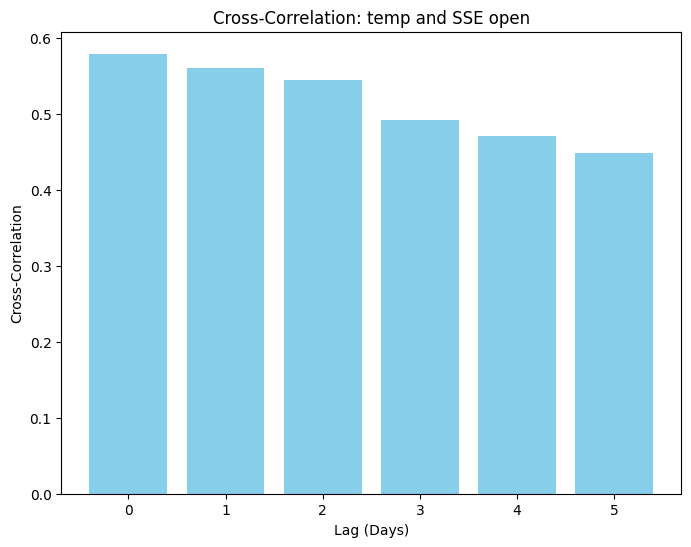

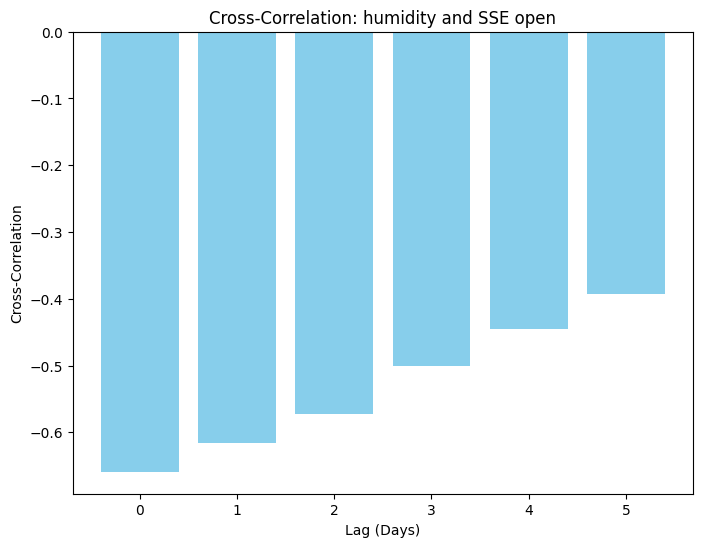

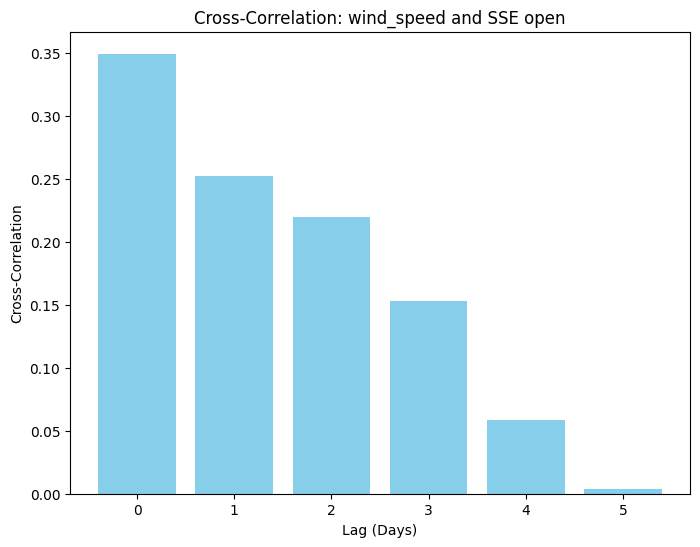

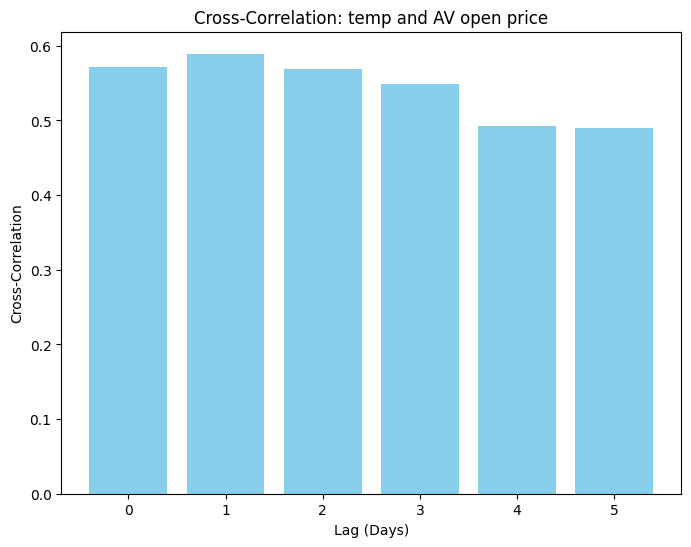

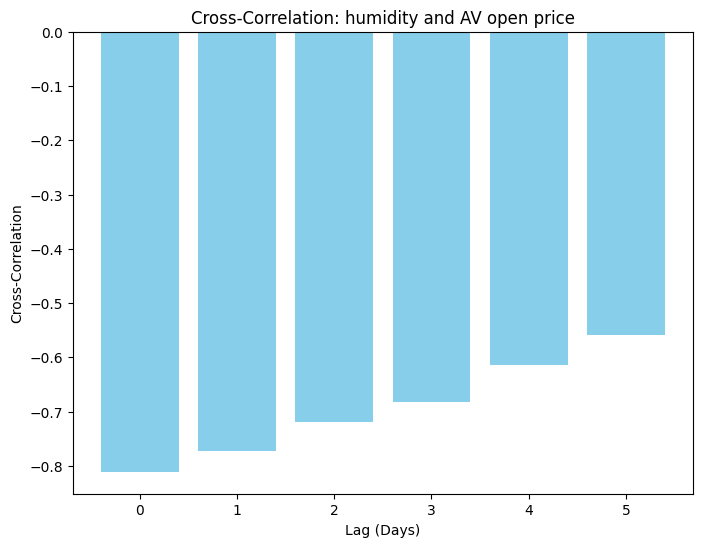

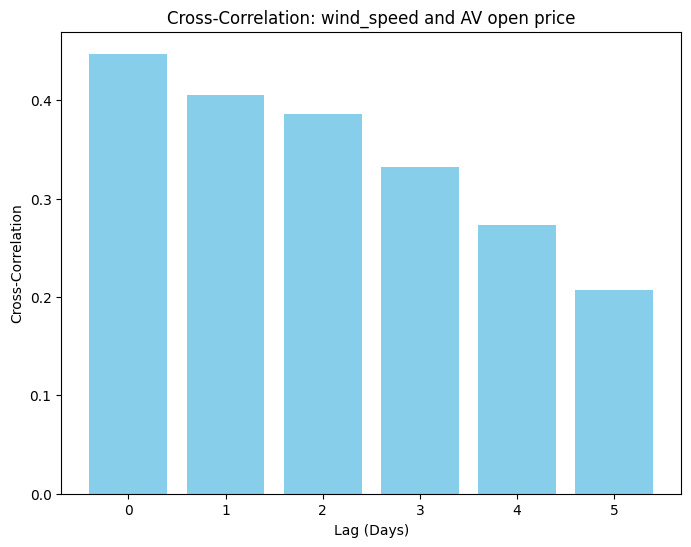

In [8]:
from statsmodels.tsa.stattools import ccf

# Function to plot cross-correlation
def plot_cross_correlation(stock, factor, lags=5):
    # Compute cross-correlation values
    cross_corr = ccf(data[stock], data[factor])[:lags + 1]
    lag_range = range(lags + 1)

    # Plot the cross-correlation
    plt.figure(figsize=(8, 6))
    plt.bar(lag_range, cross_corr, color='skyblue')
    plt.title(f"Cross-Correlation: {factor} and {stock}")
    plt.xlabel("Lag (Days)")
    plt.ylabel("Cross-Correlation")
    plt.xticks(lag_range)
    plt.show()

# Perform cross-correlation analysis for SSE and Aviva with significant weather factors
for stock in ['SSE open', 'AV open price']:
    for factor in ['temp', 'humidity', 'wind_speed']:
        plot_cross_correlation(stock, factor, lags=5)


K-means Clustering

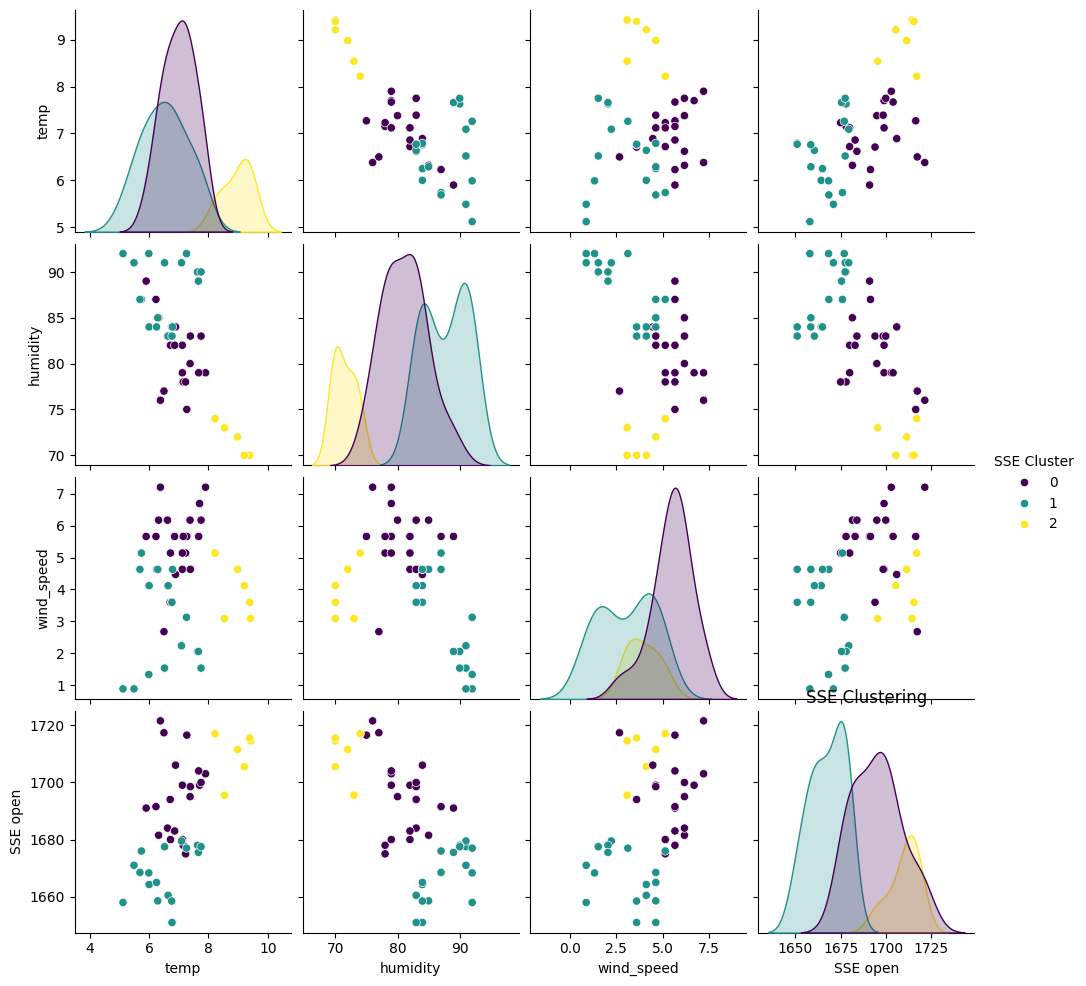

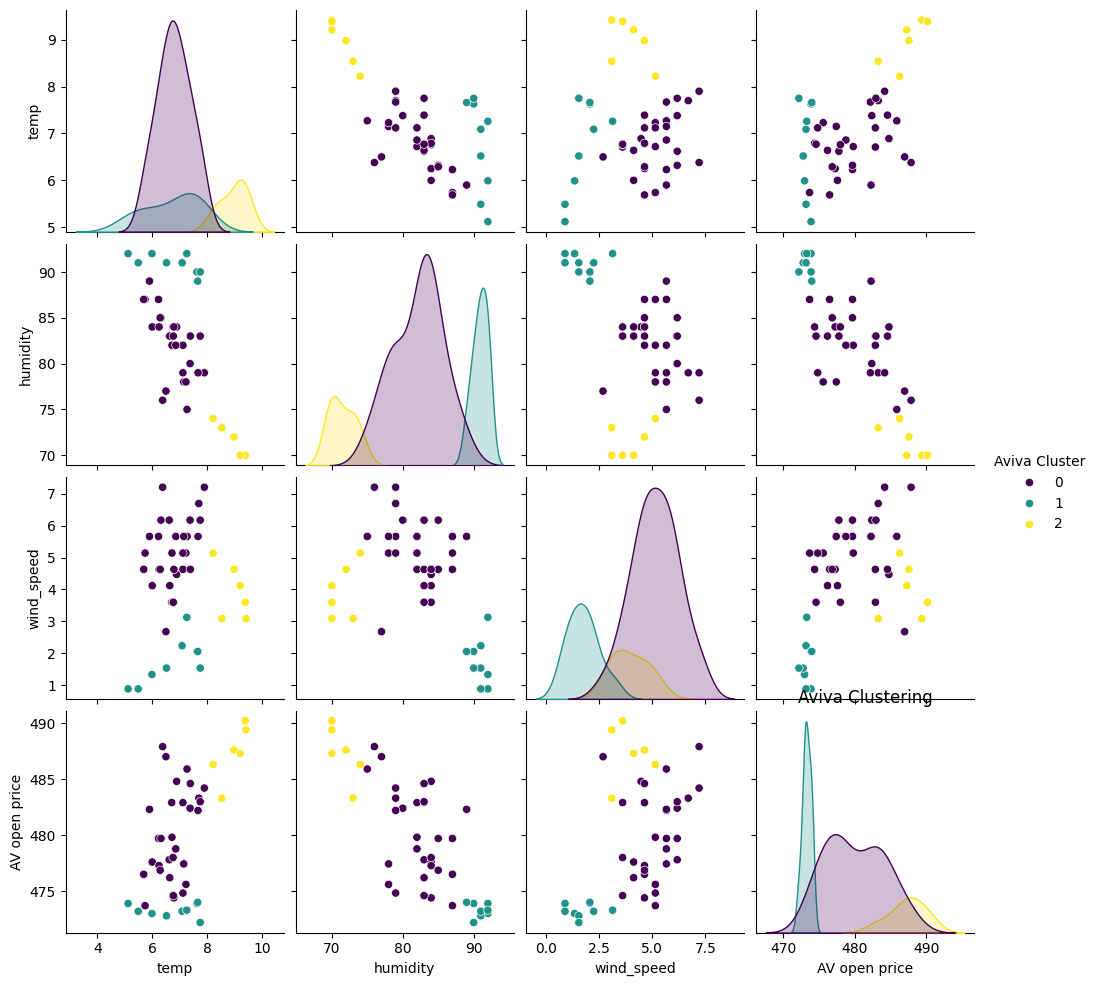

In [10]:
# Perform clustering separately for SSE and Aviva

# SSE Clustering
sse_clustering_data = data[['temp', 'humidity', 'wind_speed', 'SSE open']]
sse_clustering_scaled = scaler.fit_transform(sse_clustering_data)

# K-Means for SSE
kmeans_sse = KMeans(n_clusters=3, random_state=42)
sse_clusters = kmeans_sse.fit_predict(sse_clustering_scaled)
data['SSE Cluster'] = sse_clusters

# Aviva Clustering
aviva_clustering_data = data[['temp', 'humidity', 'wind_speed', 'AV open price']]
aviva_clustering_scaled = scaler.fit_transform(aviva_clustering_data)

# K-Means for Aviva
kmeans_aviva = KMeans(n_clusters=3, random_state=42)
aviva_clusters = kmeans_aviva.fit_predict(aviva_clustering_scaled)
data['Aviva Cluster'] = aviva_clusters

# Visualize SSE Clusters
sns.pairplot(data, vars=['temp', 'humidity', 'wind_speed', 'SSE open'],
             hue='SSE Cluster', palette='viridis', diag_kind='kde')
plt.title("SSE Clustering")
plt.show()

# Visualize Aviva Clusters
sns.pairplot(data, vars=['temp', 'humidity', 'wind_speed', 'AV open price'],
             hue='Aviva Cluster', palette='viridis', diag_kind='kde')
plt.title("Aviva Clustering")
plt.show()
